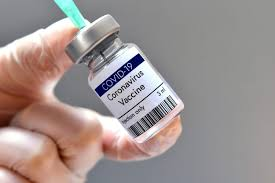

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import n_colors
from IPython.display import Image

In [ ]:
covid_vaccination = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")

In [ ]:
covid_vaccination.head()

In [ ]:
covid_vaccination.info()

In [ ]:
covid_vaccination.shape

### There are so much null values are there.

In [ ]:
covid_vaccination.isnull().sum()

In [ ]:
total_rows = covid_vaccination.shape[0]

In [ ]:
null_count = covid_vaccination.isnull().sum()

### null_rows_percentage

In [ ]:
null_count_pct = (null_count/total_rows)*100
null_count_pct

In [ ]:
pd.DataFrame(null_count_pct ,columns = ["null_count_pct"])

In [ ]:
fig = plt.figure(figsize = (8,6))
sns.heatmap(covid_vaccination.isnull() , cbar = False)

In [ ]:
pd.options.display.max_rows = None

# Data Cleaning

### There are 312 null values in the iso_code columns.

In [ ]:
covid_vaccination["iso_code"].isnull().sum()

### Iso_code missing in these countries and all these country are lies in United_Kingdom.

In [ ]:
covid_vaccination.loc[covid_vaccination["iso_code"].isnull() , ["country"]].value_counts()

In [ ]:
covid_vaccination["country"].value_counts().head(10)

### "England" "Wales" , "Scotland" , "Northern Ireland" all country are the part of the United kingdom so replace these countries with United_Kingdom.

In [ ]:
rename_country = ["England" , "Wales" , "Scotland" , "Northern Ireland"]

for i in rename_country:
#     print(i)
     covid_vaccination["country"] = covid_vaccination["country"].str.replace(i , "United Kingdom")

### Now its look good

In [ ]:
covid_vaccination["country"].value_counts().head(10)

### UK iso_code Search from Google and then manually fill in the iso_code column.

In [ ]:
covid_vaccination.loc[covid_vaccination["iso_code"].isnull(), "iso_code"] = "GBR"

### Now you see all NaN values are filed in iso_code column.

In [ ]:
covid_vaccination[covid_vaccination["iso_code"].isnull()]

### correlation of data.

In [ ]:
plt.subplots(figsize=(8, 8))
sns.heatmap(covid_vaccination.corr() , annot=True, square=True )
plt.show()


#### people_vaccinated  greatly correlates with total_vaccinations and people_vaccinated per_hundred greatly correlates with total_vaccinations_per_hundred .


## Fill tha nan values of all columns with mode value.

In [ ]:
covid_vaccination["total_vaccinations"].mode()

In [ ]:
covid_vaccination["total_vaccinations"].fillna(0.0 ,inplace=True)

In [ ]:
covid_vaccination["people_vaccinated"].mode()

In [ ]:
covid_vaccination["people_vaccinated"].fillna(0.000000 , inplace=True)

In [ ]:
covid_vaccination["people_fully_vaccinated"].mode()

In [ ]:
covid_vaccination["people_fully_vaccinated"].fillna(12272.0 , inplace=True)

In [ ]:
covid_vaccination["daily_vaccinations_raw"].mode()

In [ ]:
covid_vaccination["daily_vaccinations_raw"].fillna(0.0 , inplace=True)

In [ ]:
covid_vaccination["daily_vaccinations"].mode()

In [ ]:
covid_vaccination["daily_vaccinations"].fillna(403.0 , inplace=True)

In [ ]:
covid_vaccination["total_vaccinations_per_hundred"].mode()

In [ ]:
covid_vaccination["total_vaccinations_per_hundred"].fillna(0.0 , inplace=True)

In [ ]:
covid_vaccination["people_vaccinated_per_hundred"].mode()

In [ ]:
covid_vaccination["people_vaccinated_per_hundred"].fillna(0.0 , inplace=True)

In [ ]:
covid_vaccination["people_fully_vaccinated_per_hundred"].mode()

In [ ]:
covid_vaccination["people_fully_vaccinated_per_hundred"].fillna(0.00 , inplace=True)

In [ ]:
covid_vaccination["daily_vaccinations_per_million"].mode()

In [ ]:
covid_vaccination["daily_vaccinations_per_million"].fillna(43.0 , inplace=True)

## Now see all Nan values are fill with mode values of each column.
## now all column is look clean and good.

In [ ]:
covid_vaccination.isnull().sum()

## Track the progress of COVID-19 vaccination

## Task 1

# What vaccines are used and in which countries?

### Some countries are using a mixed vaccination scheme (they are using more than one vaccine).

The mapping is as following:

* Moderna, Pfizer/BioNTech - USA;
* Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac - China;
* Oxford/AstraZeneca, Pfizer/BioNTech'- UK;
* Pfizer/BioNTech - mostly in all europe;
* Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm... - UAE;
* Sinovac - Turkey;
* Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V - Pakistan;

In [ ]:
pd.DataFrame(covid_vaccination.groupby("country")[["vaccines"]].max())

## vaccines are used in each country clearly shown in map.

In [ ]:
# plt.figure(figsize = (14,6))
fig = px.choropleth(locations=covid_vaccination['country'], 
                    locationmode="country names",
                    color=covid_vaccination['vaccines'],
                    title="Countries using each vaccine (different colors for each vaccine)",
                   )
fig.update_layout({'legend_orientation':'h'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()


## Daily Vaccinations

In [ ]:
fig = px.line(covid_vaccination, x = 'date', y ='daily_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)

fig.show()

## Task 2

# What country is vaccinated more people?

### United States is the top country which vaccinate his people more compared to other country.

In [ ]:
pd.DataFrame(covid_vaccination.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending = False).head(10))

In [ ]:
group = covid_vaccination.groupby("country")

In [ ]:
group["people_fully_vaccinated"].max().sort_values(ascending = False).head(20).plot.bar(figsize = (12 , 6) , title = "full vaccinated per country")

## Total vaccinations

### Analyzing which country has the largest amout of vaccinations. 

In [ ]:
pd.DataFrame(group["total_vaccinations"].max().sort_values(ascending = False).head(10))

In [ ]:
group["total_vaccinations"].max().sort_values(ascending = False).head(15).plot.bar(figsize = (12 , 6) , title = "Total vaccinations")

## Daily Vaccination per country

In [ ]:
covid_vaccination.head(1)

In [ ]:
group["daily_vaccinations"].max().sort_values(ascending = False).head(10)

#### China vaccinates nearly 2 million people per day 

In [ ]:
group["daily_vaccinations"].max().sort_values(ascending = False).head(25).plot.bar(figsize = (12 , 6) , title = "daily_vaccinations per country" )

## Daily Vaccination per million per country¶

In [ ]:
group["daily_vaccinations_per_million"].max().sort_values(ascending = False).head(10)

In [ ]:
group["daily_vaccinations_per_million"].max().sort_values(ascending = False).head(15).plot.bar(figsize = (12 , 6) , title = "daily_vaccinations per million per country")

## people Vaccinated per country

In [ ]:
group["people_vaccinated"].max().sort_values(ascending = False).head(10)

In [ ]:
group["people_vaccinated"].max().sort_values(ascending = False).head(15).plot.bar(figsize = (12 , 6) , title = "people_vaccinated per country")

## people Vaccinated per hundred per country

In [ ]:
group["people_vaccinated_per_hundred"].max().sort_values(ascending = False).head(10)

In [ ]:
group["people_vaccinated_per_hundred"].max().sort_values(ascending = False).head(15).plot.bar(figsize = (12 , 6) , title = "people_vaccinated per hundred per country")

## people_fully_vaccinated_per_hundred

In [ ]:
group["people_fully_vaccinated_per_hundred"].max().sort_values(ascending = False).head(10)

In [ ]:
group["people_fully_vaccinated_per_hundred"].max().sort_values(ascending = False).head(15).plot.bar(figsize = (12 , 6) , title = "people fully vaccinated per hundred per country")

### if you like my notebook plz upvote
### working on what are the factors that influence vaccination?